# Eigenwerte und Eigenvektoren mit Python


In [1]:
import sympy as sp

### Beispiel mit Sympy

In [2]:
#Matrix A erstellen
A = sp.Matrix([[2,0,0],[1,2,3], [1,0,5]])
A

Matrix([
[2, 0, 0],
[1, 2, 3],
[1, 0, 5]])

In [3]:
#Eigenwerte auslesen
A.eigenvals()

{2: 2, 5: 1}

Sympy gibt zusätzlich zu den Eigenwerten auch die Algebraische Vielfachheit aus.
2 hat eine Algebraische Vielfachheit von 2 und 5 hat die Algebraische Vielfachheit von 1


Weitere Beispiele

In [4]:
#Eigenvektoren
A.eigenvects()

[(2,
  2,
  [Matrix([
   [0],
   [1],
   [0]]),
   Matrix([
   [-3],
   [ 0],
   [ 1]])]),
 (5,
  1,
  [Matrix([
   [0],
   [1],
   [1]])])]

Für 2 gibt es 2 Eigenvektoren [0,1,0], [-3,0,1] und für 5 gibt es einen Eigenvektor [0,1,1]

In [5]:
#Diagonalisierung
V,D = A.diagonalize()
V

Matrix([
[0, -3, 0],
[1,  0, 1],
[0,  1, 1]])

In [6]:
D

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 5]])

Gibt Matrix V mit den Eigenvektoren und Matrix D mit den Eigenwerten auf der Diagonale angeordnet

In [7]:
#Diagonalisierbarkeit prüfen mithilfe der Inverse
V_inv = V.inv()
V_inv

Matrix([
[-1/3, 1, -1],
[-1/3, 0,  0],
[ 1/3, 0,  1]])

In [8]:
#Matrix D erstellen (@ dient als Produktzeichen in Sympy)
V_inv@A@V

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 5]])

# Beispiel mit Numpy


In [9]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

In [10]:
#Matrix A erstellen
A = np.array([[2,0,0],[1,2,3],[1,0,5]])
A

array([[2, 0, 0],
       [1, 2, 3],
       [1, 0, 5]])

In [11]:
eVal, eVec = np.linalg.eig(A)

In [12]:
#Eigenwerte auslesen
eVal

array([2., 5., 2.])

In [13]:
#Eigenvektoren auslesen
eVec

array([[ 0.        ,  0.        ,  0.94208241],
       [ 1.        ,  0.70710678, -0.1177603 ],
       [ 0.        ,  0.70710678, -0.31402747]])

# Übungen aus LE1

### Aufgabe 15

<img src="/Users/christianheeb/Library/CloudStorage/OneDrive-Persönlich/02_Ausbildung/01_Bachelor Data Science/2. Semester/08_ala/ala_python/Bilder/Aufgabe15.jpg"  width="1000">

In [14]:
# (a) Berechnen Sie die Eigenvektoren und Eigenwerte von A und geben Sie sie aus.
A = np.array([[89,75,22,102],[75,116,27,120],[22,27,33,62],[102,120,62,200]])
A

array([[ 89,  75,  22, 102],
       [ 75, 116,  27, 120],
       [ 22,  27,  33,  62],
       [102, 120,  62, 200]])

In [15]:
# Eigenwerte
ew, ev = np.linalg.eig(A)

In [16]:
ew

array([361.75382302,  42.74593101,  26.33718907,   7.16305691])

In [17]:
ev

array([[-0.42552429, -0.42476765,  0.76464379, -0.23199439],
       [-0.50507589, -0.54267519, -0.64193252, -0.19576676],
       [-0.20612674,  0.54869183, -0.05515612, -0.80833585],
       [-0.72203822,  0.4733005 ,  0.01415338,  0.50442752]])

In [18]:
# (b) Zeigen Sie, dass die einzelnen Eigenvektoren orthogonal zueinander sind. Warum ist das so?
np.round( np.dot( ev.T, ev ), 10 )

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [-0., -0., -0.,  1.]])

Die Eigenvektoren stehen orthogonal zueinander, weil die Matrix A symmetrisch ist

In [19]:
# (c) Erstellen Sie eine Matrix V aus den Eigenvektoren von A und diagonalisieren Sie damit die Matrix A.
V = ev
Vinv = np.linalg.inv(V)
D = np.round( Vinv.dot(A).dot(V), 10 )
D

array([[361.75382302,   0.        ,  -0.        ,   0.        ],
       [  0.        ,  42.74593101,   0.        ,   0.        ],
       [  0.        ,  -0.        ,  26.33718907,  -0.        ],
       [  0.        ,   0.        ,  -0.        ,   7.16305691]])

In [20]:
# (d) Berechnen Sie A20 1) indem Sie die Matrix 20x mit sich selbst multiplizieren und 2) indem Sie die bereits berechnete Diagonalmatrix D und die Matrizen V und V−1 benutzen. Welche Methode ist schneller? Wie schneidet np.linalg.matrix_power() im Vergleich dazu ab?
Methode ist schneller? Wie schneidet np.linalg.matrix_power() im Vergleich dazu ab?
res = np.eye( A.shape[0] )
for i in range(20):
    res = res.dot(A)


Object `ab` not found.



### Aufgabe 16

<img src="/Users/christianheeb/Library/CloudStorage/OneDrive-Persönlich/02_Ausbildung/01_Bachelor Data Science/2. Semester/08_ala/ala_python/Bilder/Aufgabe16.jpg"  width="1000">

In [21]:
# (a) Speichern Sie die Messpunkte in einer Matrix X ∈ R2×20.
X = np.array([[-2, -4, -6 , 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2],
              [-3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]])
X

array([[ -2,  -4,  -6,   6,  -8,   6,   3,   6,   8,  -9,  -1,   1,   4,
          2,   2,   2,  -1,  -1,   2,   2],
       [ -3,  -7, -13,  16, -14,  14,   6,  11,  18, -19,   5,   0,   3,
          3,   6,   8,  -3,  -1,   0,   9]])

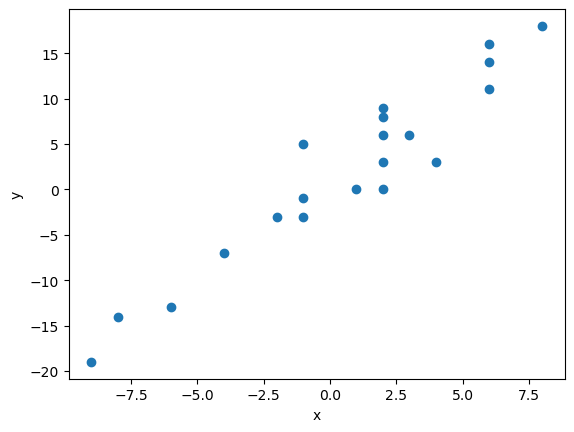

In [22]:
# (b) Stellen Sie die Messpunkte graphisch in einem zweidimensionalen Koordinatensystem dar. Sehen Sie einen Zusammenhang zwischen den Grössen x und  y ?
plt.scatter(X[0,:], X[1,:])
plt.xlabel("x")
plt.ylabel("y")

plt.show()


In [23]:
# (c) Berechnen Sie mit Numpy die Eigenvektoren v1 und v2 der Matrix XXT. Welche Eigenschaft bringt XXT automatisch mit sich mit?

# Kreuzprodukt der zwei Matrizen X und X Transponierte (T) berechnen
XXT = np.dot(X, X.T)
sp.Matrix(XXT)

Matrix([
[422,  866],
[866, 1951]])

In [24]:
# Berechnung der Eigenwerte und Eigenvektoren
ew, ev = np.linalg.eig(XXT)

# Eigenwerte ausgeben
ew

array([  31.33064012, 2341.66935988])

In [25]:
# Eigenvektoren ausgeben
ev

array([[-0.91153928, -0.41121301],
       [ 0.41121301, -0.91153928]])

In [26]:
v1 = ev[:, 0]
v2 = ev[:, 1]

sp.Matrix(v1)

Matrix([
[-0.911539280492733],
[ 0.411213010639001]])

In [27]:
sp.Matrix(v2)

Matrix([
[-0.411213010639001],
[-0.911539280492733]])

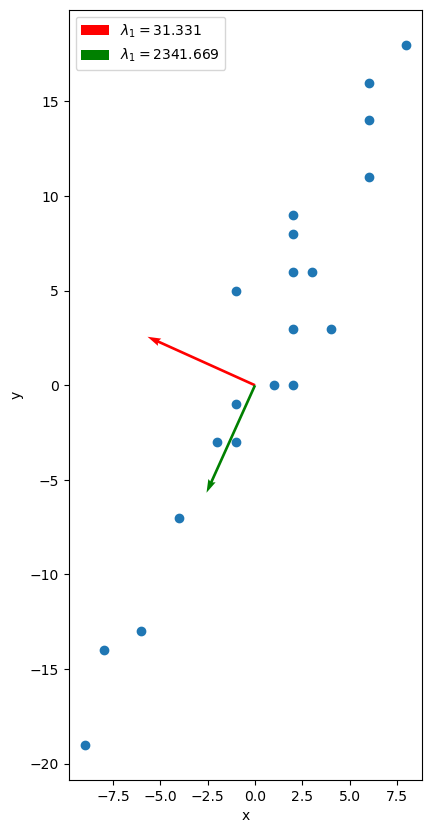

In [28]:
# (d) Überlegen Sie, wie Sie die Eigenvektoren aus (c) geeignet in die grafische Darstellung aus (b) integrieren können. In welche besonderen Richtungen zeigen die zwei Eigenvektoren?
plt.figure(figsize=(7,10))
plt.scatter(X[0,:], X[1,:])
plt.xlabel("x")
plt.ylabel("y")
plt.quiver(0, 0, *v1, color="red", scale=3, label="$\lambda_1 = {:.3f}$".format(ew[0]))
plt.quiver(0, 0, *v2, color="green", scale=3, label="$\lambda_1 = {:.3f}$".format(ew[1]))
plt.legend()
plt.gca().set_aspect("equal")